In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [3]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18082,-122.04,37.26,24.0,4973.0,709.0,1692.0,696.0,7.8627,<1H OCEAN,500001.0
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078,NEAR OCEAN,440500.0
11571,-118.01,33.76,35.0,2072.0,349.0,1249.0,317.0,3.9855,<1H OCEAN,191900.0
5655,-118.30,33.74,23.0,3075.0,860.0,1584.0,806.0,2.9386,NEAR OCEAN,260500.0
7712,-118.15,33.96,33.0,2418.0,485.0,1397.0,477.0,3.1083,<1H OCEAN,285500.0
...,...,...,...,...,...,...,...,...,...,...
19377,-120.76,37.73,16.0,1343.0,241.0,732.0,195.0,3.5833,INLAND,187500.0
5090,-118.28,33.97,31.0,1068.0,271.0,1091.0,281.0,1.6890,<1H OCEAN,102600.0
12507,-121.43,38.56,46.0,1316.0,244.0,452.0,245.0,3.0938,INLAND,137800.0
3205,-119.62,36.35,10.0,3674.0,734.0,1864.0,718.0,2.6145,INLAND,80300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

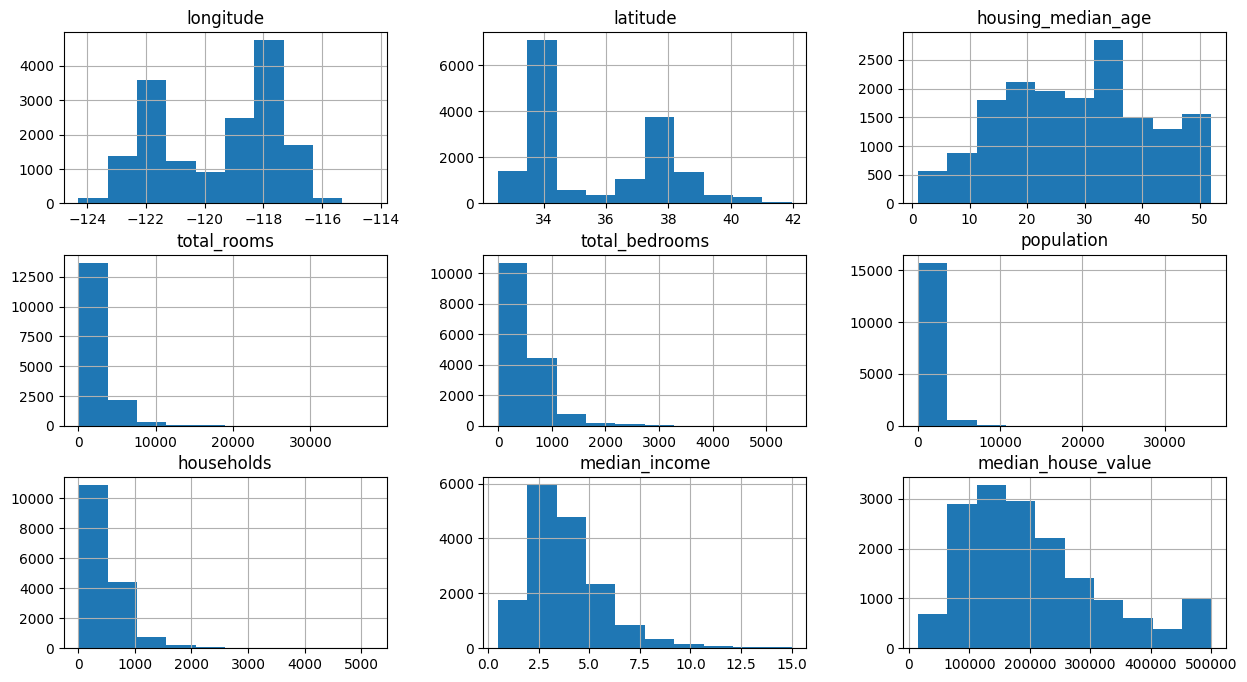

In [4]:
train_data.hist(figsize=(15,8))

<ipython-input-5-89e36abfcc5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

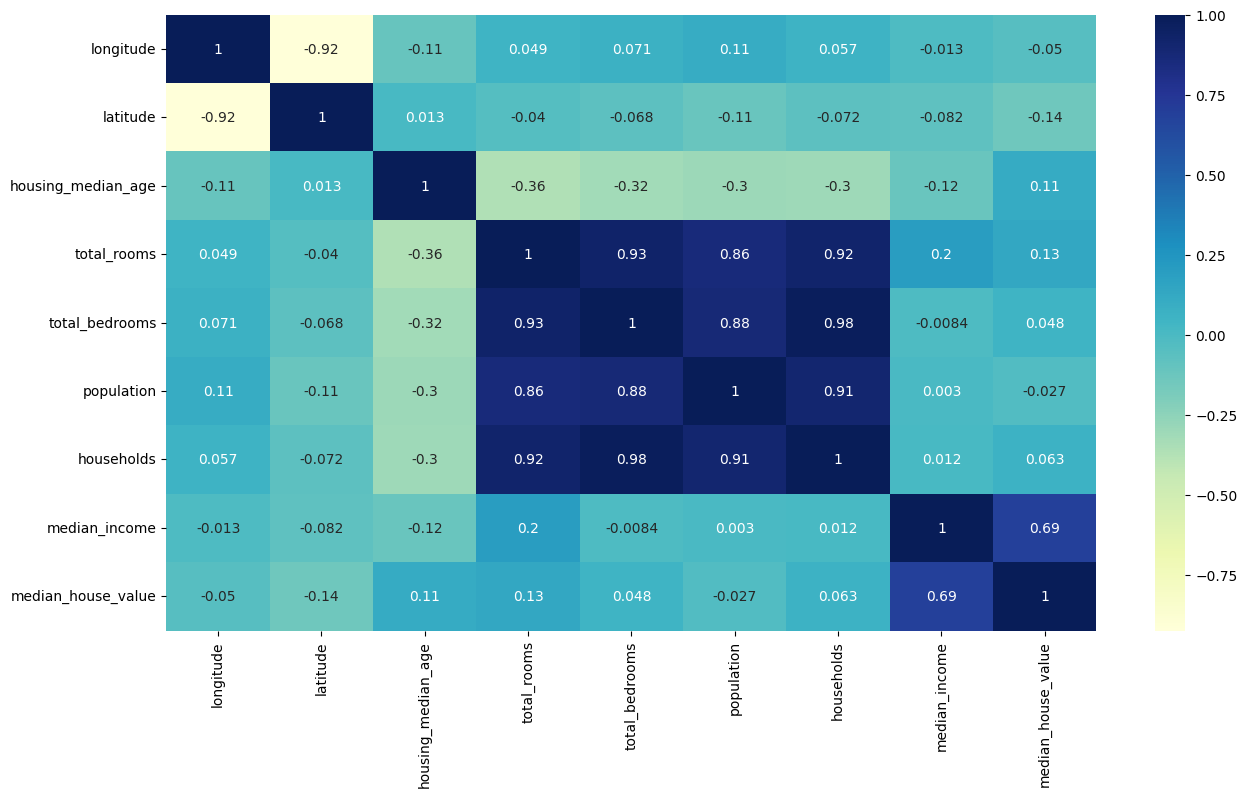

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

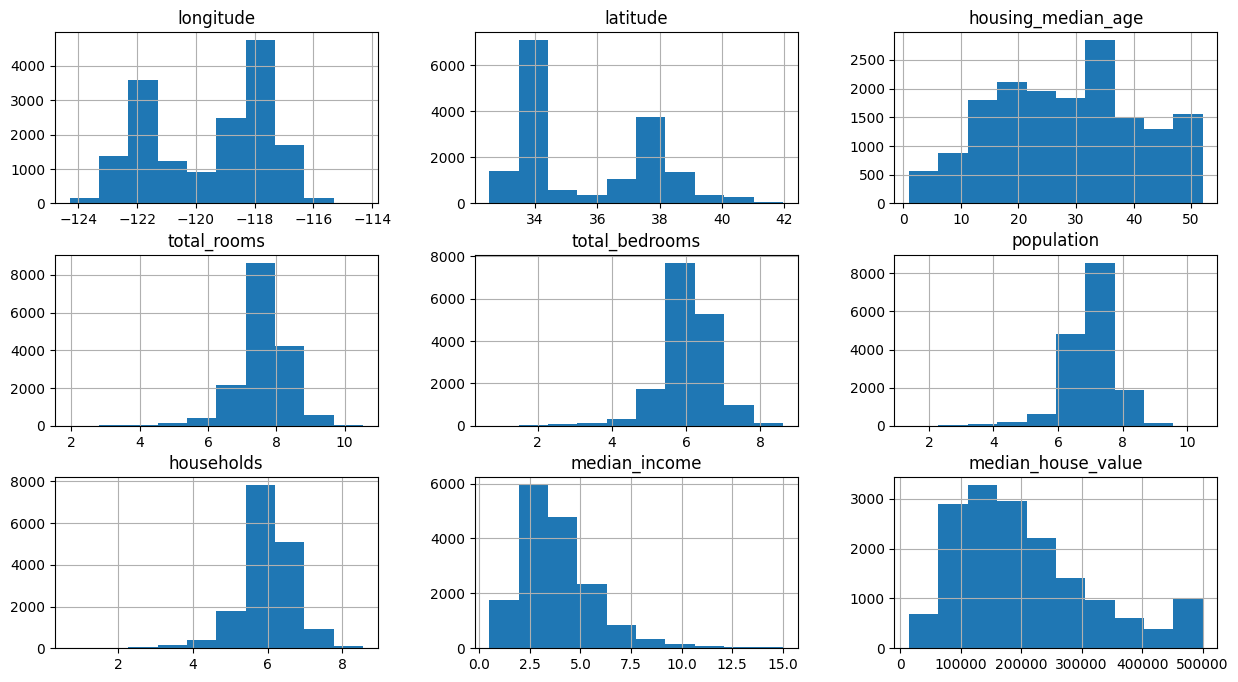

In [6]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
train_data.hist(figsize=(15,8))

In [7]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7211
INLAND        5207
NEAR OCEAN    2097
NEAR BAY      1827
ISLAND           4
Name: ocean_proximity, dtype: int64

In [8]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18082,-122.04,37.26,24.0,8.511980,6.565265,7.434257,6.546785,7.8627,500001.0,1,0,0,0,0
18620,-122.03,37.00,30.0,7.639161,5.837730,6.705639,5.796058,5.2078,440500.0,0,0,0,0,1
11571,-118.01,33.76,35.0,7.636752,5.857933,7.130899,5.762051,3.9855,191900.0,1,0,0,0,0
5655,-118.30,33.74,23.0,8.031385,6.758095,7.368340,6.693324,2.9386,260500.0,0,0,0,0,1
7712,-118.15,33.96,33.0,7.791110,6.186209,7.242798,6.169611,3.1083,285500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19377,-120.76,37.73,16.0,7.203406,5.488938,6.597146,5.278115,3.5833,187500.0,0,1,0,0,0
5090,-118.28,33.97,31.0,6.974479,5.605802,6.995766,5.641907,1.6890,102600.0,1,0,0,0,0
12507,-121.43,38.56,46.0,7.183112,5.501258,6.115892,5.505332,3.0938,137800.0,0,1,0,0,0
3205,-119.62,36.35,10.0,8.209308,6.599870,7.531016,6.577861,2.6145,80300.0,0,1,0,0,0


<Axes: >

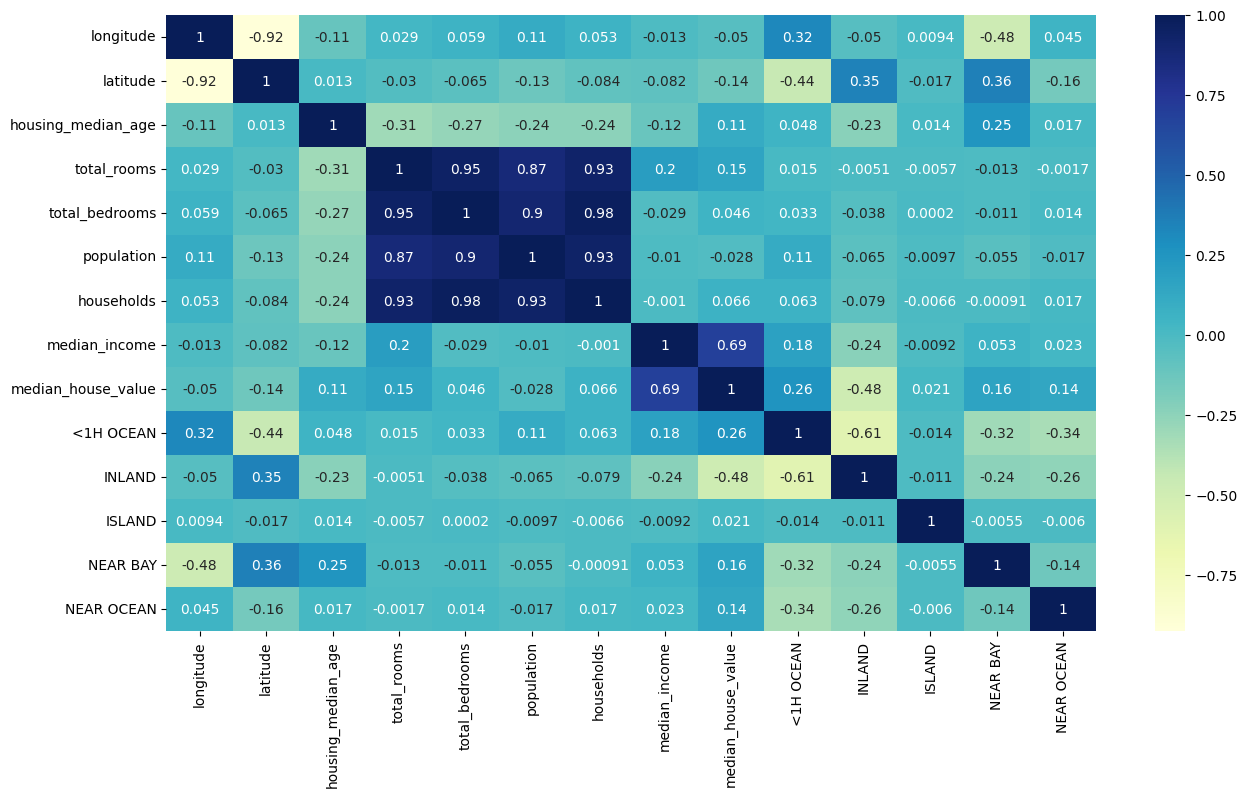

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

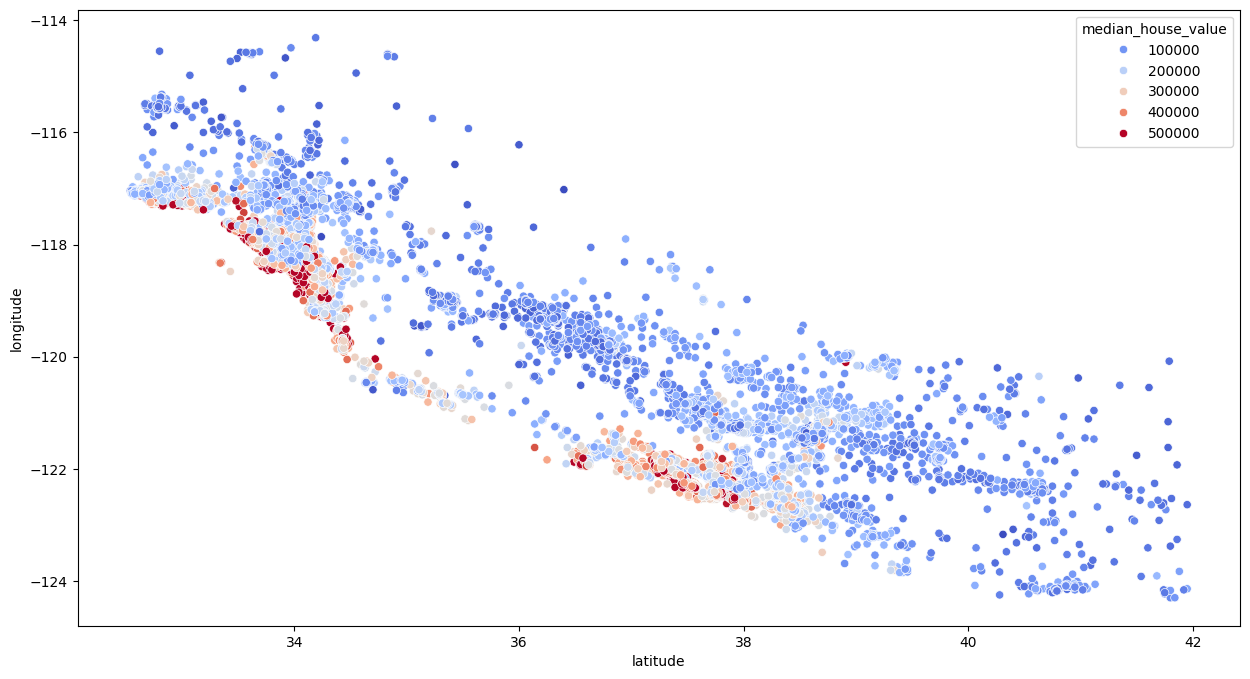

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [11]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

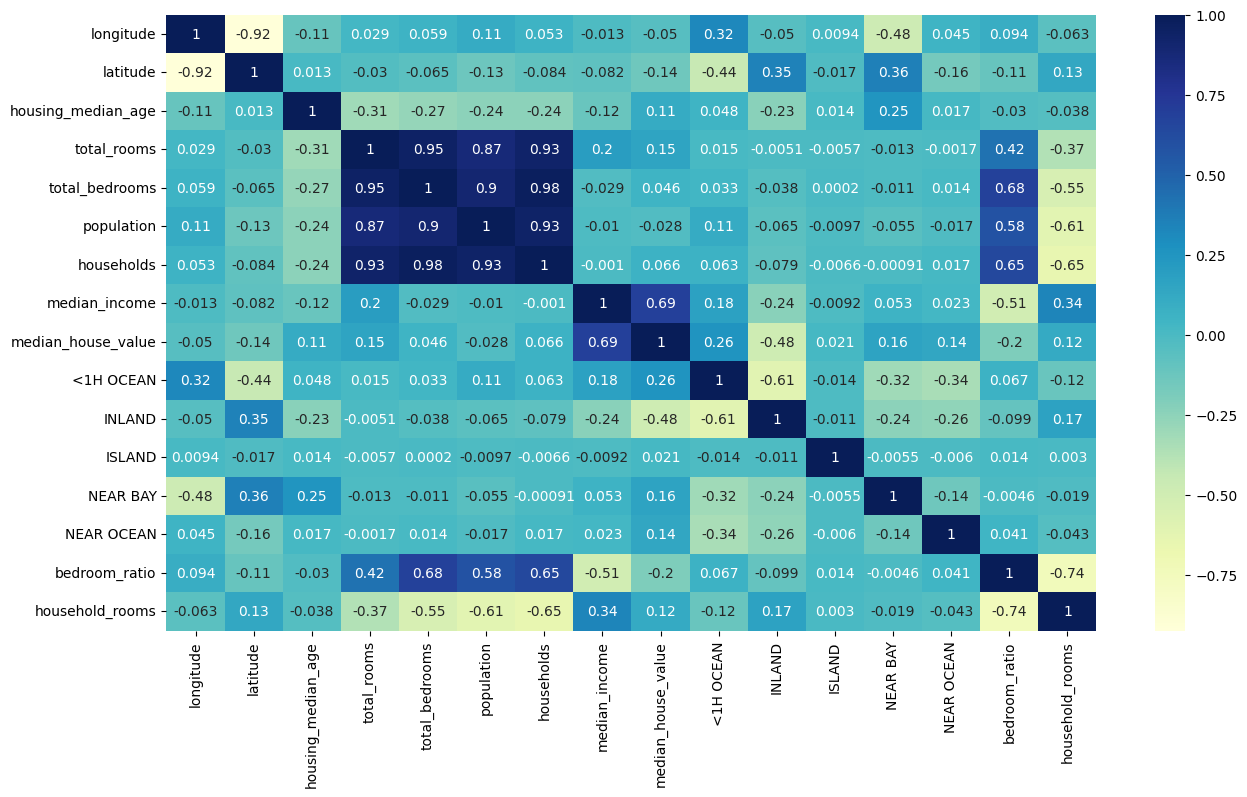

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [14]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

test_data
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [15]:
x_test_s=scaler.fit_transform(x_test)

In [16]:
reg.score(x_test_s,y_test)

0.679651738759841

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [18]:
forest.score(x_test_s,y_test)

0.7983024039174373

In [19]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid ={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}

grid_search =GridSearchCV(forest,param_grid,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [20]:
grid_search.best_estimator_.score(x_test_s,y_test)

0.799252899725315